In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_parquet('options.parquet')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9219420 entries, 0 to 9219419
Data columns (total 37 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   quote_unixtime         int64         
 1   quote_readtime         datetime64[ns]
 2   quote_date             datetime64[ns]
 3   quote_time_hours       float64       
 4   underlying_last        float64       
 5   expire_date            datetime64[ns]
 6   expire_unix            int64         
 7   dte                    float64       
 8   c_delta                float64       
 9   c_gamma                float64       
 10  c_vega                 float64       
 11  c_theta                float64       
 12  c_rho                  float64       
 13  c_iv                   float64       
 14  c_volume               int64         
 15  c_last                 float64       
 16  c_size                 object        
 17  c_bid                  float64       
 18  c_ask                 

In [9]:
df.head()

,quote_unixtime,quote_readtime,quote_date,quote_time_hours,underlying_last,expire_date,expire_unix,dte,c_delta,c_gamma,...,p_theta,p_rho,p_iv,p_volume,strike_distance,strike_distance_pct,c_contracts,c_shares_per_contract,p_contracts,p_shares_per_contract
0,1533153600,2018-08-01 16:00:00,2018-08-01,16.0,280.91,2018-08-01,1533153600,0.0,0.87175,0.00006,...,-0.00533,0.0,4.85260,1,160.9,0.573,20,20,0,9332
1,1533153600,2018-08-01 16:00:00,2018-08-01,16.0,280.91,2018-08-01,1533153600,0.0,0.87491,0.00000,...,-0.00482,0.0,4.62887,0,155.9,0.555,10,20,0,9332
2,1533153600,2018-08-01 16:00:00,2018-08-01,16.0,280.91,2018-08-01,1533153600,0.0,0.87850,0.00000,...,-0.00550,0.0,4.41302,350,150.9,0.537,10,20,0,10247
3,1533153600,2018-08-01 16:00:00,2018-08-01,16.0,280.91,2018-08-01,1533153600,0.0,0.88234,0.00007,...,-0.00509,0.0,4.20641,0,145.9,0.519,10,20,0,9332
4,1533153600,2018-08-01 16:00:00,2018-08-01,16.0,280.91,2018-08-01,1533153600,0.0,0.88602,0.00003,...,-0.00548,0.0,4.00668,0,140.9,0.502,10,20,0,9762


Drop redundant time series

In [13]:
df_2 = df.drop(columns=['quote_unixtime', 'quote_readtime', 'quote_time_hours', 'expire_unix'], axis=1)

In [14]:
df_2.head()

,quote_date,underlying_last,expire_date,dte,c_delta,c_gamma,c_vega,c_theta,c_rho,c_iv,...,p_theta,p_rho,p_iv,p_volume,strike_distance,strike_distance_pct,c_contracts,c_shares_per_contract,p_contracts,p_shares_per_contract
0,2018-08-01,280.91,2018-08-01,0.0,0.87175,0.00006,0.01564,-0.04478,0.00064,12.93983,...,-0.00533,0.0,4.85260,1,160.9,0.573,20,20,0,9332
1,2018-08-01,280.91,2018-08-01,0.0,0.87491,0.00000,0.01647,-0.05050,0.00066,12.04717,...,-0.00482,0.0,4.62887,0,155.9,0.555,10,20,0,9332
2,2018-08-01,280.91,2018-08-01,0.0,0.87850,0.00000,0.01623,-0.05006,0.00070,11.22111,...,-0.00550,0.0,4.41302,350,150.9,0.537,10,20,0,10247
3,2018-08-01,280.91,2018-08-01,0.0,0.88234,0.00007,0.01671,-0.04974,0.00014,10.45647,...,-0.00509,0.0,4.20641,0,145.9,0.519,10,20,0,9332
4,2018-08-01,280.91,2018-08-01,0.0,0.88602,0.00003,0.01677,-0.05032,0.00049,9.74583,...,-0.00548,0.0,4.00668,0,140.9,0.502,10,20,0,9762


"The Greeks"

In [36]:
df_2[['c_delta','c_gamma', 'c_vega', 'c_theta', 'c_rho', 'c_iv']].corr()

,c_delta,c_gamma,c_vega,c_theta,c_rho,c_iv
c_delta,1.000000,-0.059684,-0.002886,-0.174309,0.022645,0.202021
c_gamma,-0.059684,1.000000,-0.000743,-0.138881,-0.013700,-0.104191
c_vega,-0.002886,-0.000743,1.000000,-0.001271,0.018728,-0.005675
c_theta,-0.174309,-0.138881,-0.001271,1.000000,0.000708,-0.188030
c_rho,0.022645,-0.013700,0.018728,0.000708,1.000000,0.005922
c_iv,0.202021,-0.104191,-0.005675,-0.188030,0.005922,1.000000


<Axes: xlabel='c_delta', ylabel='Count'>

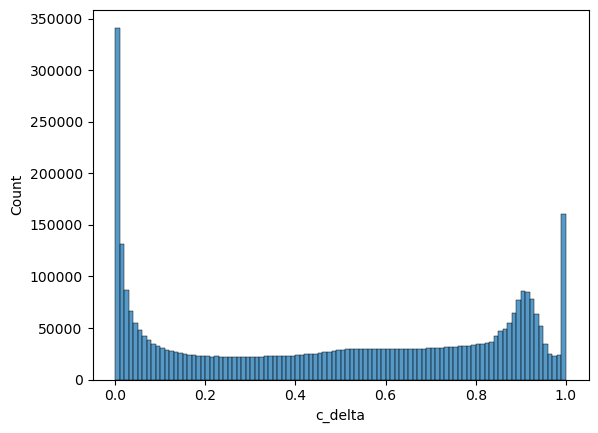

In [41]:
sns.histplot(df_2[df_2['c_volume'] > 0]['c_delta'], bins=100)

<Axes: xlabel='p_delta', ylabel='Count'>

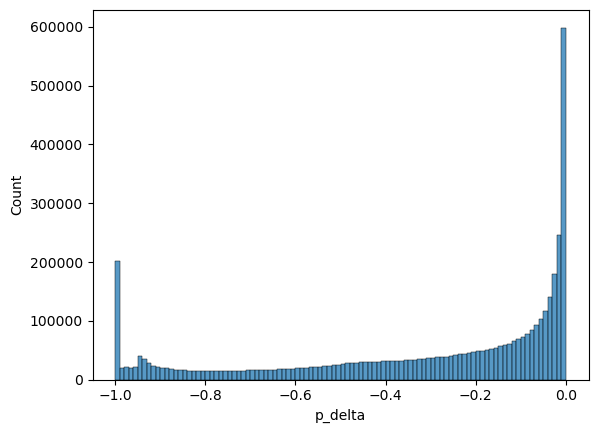

In [42]:
sns.histplot(df_2[df_2['p_volume'] > 0]['p_delta'], bins=100)

<Axes: xlabel='strike_distance_pct', ylabel='c_delta'>

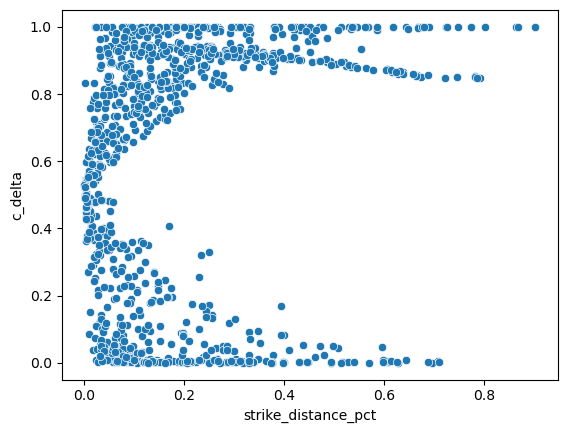

In [47]:
sns.scatterplot(x=('strike_distance_pct'), y='c_delta', data=df_2.sample(n=1_000))

In [48]:
df[(df_2['c_volume'] > 0) | (df_2['p_volume'] > 0)].shape[0] / df.shape[0] * 100

63.77434806094092

The Greeks are based on last traded, not current quote...

In [55]:
df_2[(df['dte'] == 0) & ((df_2['c_volume'] > 0) | (df_2['p_volume'] > 0))].drop(
    columns=['c_gamma', 'c_vega', 'c_theta', 'c_rho', 'c_iv', 'c_size', 'p_size', 
             'p_gamma', 'p_vega', 'p_theta', 'p_rho', 'p_iv', 'c_contracts', 
             'c_shares_per_contract', 'p_contracts', 'p_shares_per_contract']).head()

,quote_date,underlying_last,expire_date,dte,c_delta,c_volume,c_last,c_bid,c_ask,strike,p_bid,p_ask,p_last,p_delta,p_volume,strike_distance,strike_distance_pct
0,2018-08-01,280.91,2018-08-01,0.0,0.87175,0,0.0,160.06,161.85,120.0,0.0,0.01,0.01,-0.00009,1,160.9,0.573
2,2018-08-01,280.91,2018-08-01,0.0,0.87850,0,0.0,150.05,151.86,130.0,0.0,0.01,0.02,-0.00065,350,150.9,0.537
5,2018-08-01,280.91,2018-08-01,0.0,0.89000,0,0.0,135.06,136.86,145.0,0.0,0.02,0.01,-0.00071,588,135.9,0.484
6,2018-08-01,280.91,2018-08-01,0.0,0.89333,0,0.0,130.06,131.86,150.0,0.0,0.01,0.01,-0.00058,392,130.9,0.466
7,2018-08-01,280.91,2018-08-01,0.0,0.89738,0,0.0,125.06,126.86,155.0,0.0,0.01,0.01,-0.00040,14,125.9,0.448


In [115]:
df_3 = df_2[['quote_date', 'expire_date', 'strike', 'underlying_last',  
             'c_bid', 'c_ask', 'c_volume', 'p_bid', 'p_ask', 'p_volume']]

In [ ]:
df_3.rename(columns={'underlying_last': 'spy'}, inplace=True)

In [117]:
df_3.head()

,quote_date,expire_date,strike,spy,c_bid,c_ask,c_volume,p_bid,p_ask,p_volume
0,2018-08-01,2018-08-01,120.0,280.91,160.06,161.85,0,0.0,0.01,1
1,2018-08-01,2018-08-01,125.0,280.91,155.05,156.86,0,0.0,0.01,0
2,2018-08-01,2018-08-01,130.0,280.91,150.05,151.86,0,0.0,0.01,350
3,2018-08-01,2018-08-01,135.0,280.91,145.06,146.85,0,0.0,0.01,0
4,2018-08-01,2018-08-01,140.0,280.91,140.06,141.85,0,0.0,0.02,0


In [ ]:
df_3['c_intrinsic'] = df_3['spy'] - df_3['strike']
df_3['p_intrinsic'] = df_3['strike'] - df_3['spy']

In [ ]:
df_3['c_intrinsic'] = df_3['c_intrinsic'].clip(lower=0)
df_3['p_intrinsic'] = df_3['p_intrinsic'].clip(lower=0)

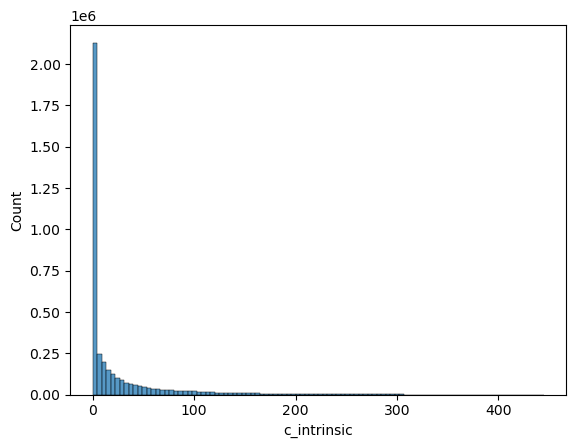

In [121]:
sns.histplot(df_3[df_3['c_volume'] > 0]['c_intrinsic'], bins=100);

In [ ]:
df_3.sort_values(by=['quote_date', 'expire_date', 'strike'], inplace=True)

In [124]:
df_3.reset_index(drop=True, inplace=True)

In [126]:
df_3

,quote_date,expire_date,strike,spy,c_bid,c_ask,c_volume,p_bid,p_ask,p_volume,c_intrinsic,p_intrinsic
0,2010-01-04,2010-01-15,55.0,113.29,58.20,58.40,0,0.0,0.02,0,58.29,0.0
1,2010-01-04,2010-01-15,56.0,113.29,57.20,57.40,0,0.0,0.01,0,57.29,0.0
2,2010-01-04,2010-01-15,57.0,113.29,56.20,56.39,0,0.0,0.01,0,56.29,0.0
3,2010-01-04,2010-01-15,58.0,113.29,55.19,55.40,0,0.0,0.03,0,55.29,0.0
4,2010-01-04,2010-01-15,59.0,113.29,54.20,54.40,0,0.0,0.02,0,54.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9219415,2023-09-29,2026-01-16,650.0,427.40,0.99,4.45,0,220.0,225.00,0,0.00,222.6
9219416,2023-09-29,2026-01-16,655.0,427.40,0.05,4.47,0,225.0,230.00,0,0.00,227.6
9219417,2023-09-29,2026-01-16,660.0,427.40,0.01,5.00,0,230.0,235.00,0,0.00,232.6
9219418,2023-09-29,2026-01-16,665.0,427.40,0.01,5.00,0,235.0,240.00,0,0.00,237.6


In [108]:
df_3['quote_date'].nunique(), df_3['expire_date'].nunique()

(3445, 1506)

In [139]:
df_spy = pd.read_csv('spy.csv', parse_dates=['Date'])
df_spy.columns = map(str.lower, df_spy.columns)

In [140]:
df_spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7748 entries, 0 to 7747
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       7748 non-null   datetime64[ns]
 1   open       7748 non-null   float64       
 2   high       7748 non-null   float64       
 3   low        7748 non-null   float64       
 4   close      7748 non-null   float64       
 5   adj close  7748 non-null   float64       
 6   volume     7748 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 423.8 KB


In [141]:
df_spy

,date,open,high,low,close,adj close,volume
0,1993-01-29,43.968750,43.968750,43.750000,43.937500,24.941395,1003200
1,1993-02-01,43.968750,44.250000,43.968750,44.250000,25.118782,480500
2,1993-02-02,44.218750,44.375000,44.125000,44.343750,25.172020,201300
3,1993-02-03,44.406250,44.843750,44.375000,44.812500,25.438091,529400
4,1993-02-04,44.968750,45.093750,44.468750,45.000000,25.544521,531500
...,...,...,...,...,...,...,...
7743,2023-10-30,413.559998,416.679993,412.220001,415.589996,415.589996,86562700
7744,2023-10-31,416.179993,418.529999,414.209991,418.200012,418.200012,79665200
7745,2023-11-01,419.200012,423.500000,418.649994,422.660004,422.660004,98068100
7746,2023-11-02,426.579987,430.920013,426.559998,430.760010,430.760010,94938900


In [143]:
df_4 = pd.merge(df_3, df_spy[['date', 'close']], left_on='expire_date', right_on='date')

In [144]:
df_4

,quote_date,expire_date,strike,spy,c_bid,c_ask,c_volume,p_bid,p_ask,p_volume,c_intrinsic,p_intrinsic,date,close
0,2010-01-04,2010-01-15,55.0,113.29,58.20,58.40,0,0.00,0.02,0,58.29,0.0,2010-01-15,113.639999
1,2010-01-04,2010-01-15,56.0,113.29,57.20,57.40,0,0.00,0.01,0,57.29,0.0,2010-01-15,113.639999
2,2010-01-04,2010-01-15,57.0,113.29,56.20,56.39,0,0.00,0.01,0,56.29,0.0,2010-01-15,113.639999
3,2010-01-04,2010-01-15,58.0,113.29,55.19,55.40,0,0.00,0.03,0,55.29,0.0,2010-01-15,113.639999
4,2010-01-04,2010-01-15,59.0,113.29,54.20,54.40,0,0.00,0.02,0,54.29,0.0,2010-01-15,113.639999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8793417,2023-09-29,2023-10-12,485.0,427.40,0.00,0.01,0,56.94,58.28,0,0.00,57.6,2023-10-12,433.660004
8793418,2023-09-29,2023-10-12,486.0,427.40,0.00,0.01,0,57.83,59.75,0,0.00,58.6,2023-10-12,433.660004
8793419,2023-09-29,2023-10-12,487.0,427.40,0.00,0.01,0,58.77,60.43,0,0.00,59.6,2023-10-12,433.660004
8793420,2023-09-29,2023-10-12,488.0,427.40,0.00,0.01,0,59.92,61.28,0,0.00,60.6,2023-10-12,433.660004


In [ ]:
df_4.rename(columns={'close': 'spy_expire'}, inplace=True)
df_4.drop(columns=['date'], inplace=True)

In [146]:
# ~250, 21, and 5 trading days per year, month, and week respectively
df_spy['252_high'] = df_spy['high'].rolling(window=252).max()
df_spy['252_low'] = df_spy['low'].rolling(window=252).min()

df_spy['21_high'] = df_spy['high'].rolling(window=21).max()
df_spy['21_low'] = df_spy['low'].rolling(window=21).min()

df_spy['5_high'] = df_spy['high'].rolling(window=5).max()
df_spy['5_low'] = df_spy['low'].rolling(window=5).min()

# 5, 10, 20, 50, 100, and 200 day moving averages
df_spy['5_ma'] = df_spy['close'].rolling(window=5).mean()
df_spy['10_ma'] = df_spy['close'].rolling(window=10).mean()
df_spy['20_ma'] = df_spy['close'].rolling(window=20).mean()
df_spy['50_ma'] = df_spy['close'].rolling(window=50).mean()
df_spy['100_ma'] = df_spy['close'].rolling(window=100).mean()
df_spy['200_ma'] = df_spy['close'].rolling(window=200).mean()

In [147]:
df_spy

,date,open,high,low,close,adj close,volume,252_high,252_low,21_high,21_low,5_high,5_low,5_ma,10_ma,20_ma,50_ma,100_ma,200_ma
0,1993-01-29,43.968750,43.968750,43.750000,43.937500,24.941395,1003200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-02-01,43.968750,44.250000,43.968750,44.250000,25.118782,480500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-02-02,44.218750,44.375000,44.125000,44.343750,25.172020,201300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-02-03,44.406250,44.843750,44.375000,44.812500,25.438091,529400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-02-04,44.968750,45.093750,44.468750,45.000000,25.544521,531500,NaN,NaN,NaN,NaN,45.093750,43.750000,44.468750,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7743,2023-10-30,413.559998,416.679993,412.220001,415.589996,415.589996,86562700,459.440002,368.790009,438.140015,409.209991,424.820007,409.209991,415.999994,421.430994,425.947499,434.711401,439.430401,423.106151
7744,2023-10-31,416.179993,418.529999,414.209991,418.200012,418.200012,79665200,459.440002,368.790009,438.140015,409.209991,421.920013,409.209991,414.913995,419.648996,425.778000,434.288601,439.321101,423.204651
7745,2023-11-01,419.200012,423.500000,418.649994,422.660004,422.660004,98068100,459.440002,368.790009,438.140015,409.209991,423.500000,409.209991,415.935999,418.893997,425.678000,433.978801,439.248701,423.329101
7746,2023-11-02,426.579987,430.920013,426.559998,430.760010,430.760010,94938900,459.440002,368.790009,438.140015,409.209991,430.920013,409.209991,419.578003,419.326999,425.991000,433.733402,439.218301,423.525451


In [149]:
df_5 = pd.merge(df_4, df_spy, left_on='quote_date', right_on='date')

In [154]:
df_5

,quote_date,expire_date,strike,spy,c_bid,c_ask,c_volume,p_bid,p_ask,p_volume,...,21_high,21_low,5_high,5_low,5_ma,10_ma,20_ma,50_ma,100_ma,200_ma
0,2010-01-04,2010-01-15,55.0,113.29,58.20,58.40,0,0.00,0.02,0,...,113.389999,109.019997,113.389999,111.389999,112.514000,112.027000,111.421000,109.766200,107.144900,98.780800
1,2010-01-04,2010-01-15,56.0,113.29,57.20,57.40,0,0.00,0.01,0,...,113.389999,109.019997,113.389999,111.389999,112.514000,112.027000,111.421000,109.766200,107.144900,98.780800
2,2010-01-04,2010-01-15,57.0,113.29,56.20,56.39,0,0.00,0.01,0,...,113.389999,109.019997,113.389999,111.389999,112.514000,112.027000,111.421000,109.766200,107.144900,98.780800
3,2010-01-04,2010-01-15,58.0,113.29,55.19,55.40,0,0.00,0.03,0,...,113.389999,109.019997,113.389999,111.389999,112.514000,112.027000,111.421000,109.766200,107.144900,98.780800
4,2010-01-04,2010-01-15,59.0,113.29,54.20,54.40,0,0.00,0.02,0,...,113.389999,109.019997,113.389999,111.389999,112.514000,112.027000,111.421000,109.766200,107.144900,98.780800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8752190,2023-09-29,2023-10-12,485.0,427.40,0.00,0.01,0,56.94,58.28,0,...,453.670013,422.290009,432.269989,422.290009,428.032001,432.695004,439.932501,444.326002,437.687101,418.932751
8752191,2023-09-29,2023-10-12,486.0,427.40,0.00,0.01,0,57.83,59.75,0,...,453.670013,422.290009,432.269989,422.290009,428.032001,432.695004,439.932501,444.326002,437.687101,418.932751
8752192,2023-09-29,2023-10-12,487.0,427.40,0.00,0.01,0,58.77,60.43,0,...,453.670013,422.290009,432.269989,422.290009,428.032001,432.695004,439.932501,444.326002,437.687101,418.932751
8752193,2023-09-29,2023-10-12,488.0,427.40,0.00,0.01,0,59.92,61.28,0,...,453.670013,422.290009,432.269989,422.290009,428.032001,432.695004,439.932501,444.326002,437.687101,418.932751


In [155]:
df_dates = df_5[['quote_date', 'expire_date']].drop_duplicates()

In [158]:
df_dates

,quote_date,expire_date
0,2010-01-04,2010-01-15
110,2010-01-04,2010-02-19
220,2010-01-04,2010-03-19
331,2010-01-04,2010-03-31
402,2010-01-04,2010-06-18
...,...,...
8751579,2023-09-29,2023-11-03
8751674,2023-09-29,2023-10-09
8751806,2023-09-29,2023-10-10
8751938,2023-09-29,2023-10-11


In [161]:
df_dates.groupby('expire_date').agg({'quote_date': 'count'})

,quote_date
expire_date,
2010-01-15,10
2010-02-19,33
2010-03-19,53
2010-03-31,61
2010-04-16,61
...,...
2023-10-12,2
2023-10-13,21
2023-10-20,147


<Axes: xlabel='expire_date'>

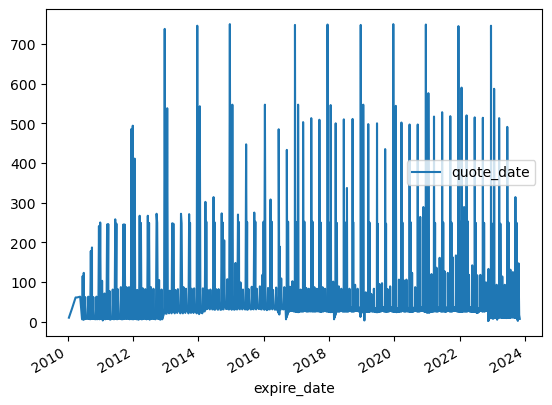

In [159]:
df_dates.groupby('expire_date').agg({'quote_date': 'count'}).plot()

In [171]:
import pandas_market_calendars as mcal
nyse = mcal.get_calendar('NYSE')
schedule = nyse.schedule(start_date='2010-01-01', end_date='2023-12-31')
all_trading_days = mcal.date_range(schedule, frequency='1D')

In [172]:
all_trading_days

DatetimeIndex(['2010-01-04 21:00:00+00:00', '2010-01-05 21:00:00+00:00',
               '2010-01-06 21:00:00+00:00', '2010-01-07 21:00:00+00:00',
               '2010-01-08 21:00:00+00:00', '2010-01-11 21:00:00+00:00',
               '2010-01-12 21:00:00+00:00', '2010-01-13 21:00:00+00:00',
               '2010-01-14 21:00:00+00:00', '2010-01-15 21:00:00+00:00',
               ...
               '2023-12-15 21:00:00+00:00', '2023-12-18 21:00:00+00:00',
               '2023-12-19 21:00:00+00:00', '2023-12-20 21:00:00+00:00',
               '2023-12-21 21:00:00+00:00', '2023-12-22 21:00:00+00:00',
               '2023-12-26 21:00:00+00:00', '2023-12-27 21:00:00+00:00',
               '2023-12-28 21:00:00+00:00', '2023-12-29 21:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=3522, freq=None)

In [196]:
trading_days_df = pd.DataFrame(all_trading_days, columns=['trading_day'])
trading_days_df['trading_day'] = trading_days_df['trading_day'].dt.tz_convert(None)
trading_days_df['trading_day'] = trading_days_df['trading_day'].dt.normalize()
trading_days_df['last_trading_day'] = trading_days_df['trading_day'].shift(1)

In [197]:
trading_days_df

,trading_day,last_trading_day
0,2010-01-04,NaT
1,2010-01-05,2010-01-04
2,2010-01-06,2010-01-05
3,2010-01-07,2010-01-06
4,2010-01-08,2010-01-07
...,...,...
3517,2023-12-22,2023-12-21
3518,2023-12-26,2023-12-22
3519,2023-12-27,2023-12-26
3520,2023-12-28,2023-12-27


In [198]:
trading_days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   trading_day       3522 non-null   datetime64[ns]
 1   last_trading_day  3521 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 55.2 KB


In [199]:
df_6 = pd.merge(df_5, trading_days_df, left_on='expire_date', right_on='trading_day', how='left')
df_6 = df_6[df_6['quote_date'] == df_6['last_trading_day']]


In [200]:
df_6

,quote_date,expire_date,strike,spy,c_bid,c_ask,c_volume,p_bid,p_ask,p_volume,...,5_high,5_low,5_ma,10_ma,20_ma,50_ma,100_ma,200_ma,trading_day,last_trading_day
7819,2010-01-14,2010-01-15,55.0,114.92,59.86,60.15,0,0.00,0.01,0,...,115.139999,113.220001,114.502002,113.881001,112.800500,111.053400,108.240500,100.130950,2010-01-15,2010-01-14
7820,2010-01-14,2010-01-15,56.0,114.92,58.85,59.15,0,0.00,0.02,0,...,115.139999,113.220001,114.502002,113.881001,112.800500,111.053400,108.240500,100.130950,2010-01-15,2010-01-14
7821,2010-01-14,2010-01-15,57.0,114.92,57.86,58.15,0,0.00,0.02,0,...,115.139999,113.220001,114.502002,113.881001,112.800500,111.053400,108.240500,100.130950,2010-01-15,2010-01-14
7822,2010-01-14,2010-01-15,58.0,114.92,56.86,57.15,0,0.00,0.01,0,...,115.139999,113.220001,114.502002,113.881001,112.800500,111.053400,108.240500,100.130950,2010-01-15,2010-01-14
7823,2010-01-14,2010-01-15,59.0,114.92,55.85,56.15,0,0.00,0.02,0,...,115.139999,113.220001,114.502002,113.881001,112.800500,111.053400,108.240500,100.130950,2010-01-15,2010-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751155,2023-09-29,2023-10-02,498.0,427.40,0.00,0.01,0,70.35,71.02,0,...,432.269989,422.290009,428.032001,432.695004,439.932501,444.326002,437.687101,418.932751,2023-10-02,2023-09-29
8751156,2023-09-29,2023-10-02,499.0,427.40,0.00,0.01,0,71.60,71.83,0,...,432.269989,422.290009,428.032001,432.695004,439.932501,444.326002,437.687101,418.932751,2023-10-02,2023-09-29
8751157,2023-09-29,2023-10-02,500.0,427.40,0.00,0.01,0,72.35,73.02,0,...,432.269989,422.290009,428.032001,432.695004,439.932501,444.326002,437.687101,418.932751,2023-10-02,2023-09-29
8751158,2023-09-29,2023-10-02,505.0,427.40,0.00,0.01,0,77.59,78.01,0,...,432.269989,422.290009,428.032001,432.695004,439.932501,444.326002,437.687101,418.932751,2023-10-02,2023-09-29


In [201]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168243 entries, 7819 to 8751159
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   quote_date        168243 non-null  datetime64[ns]
 1   expire_date       168243 non-null  datetime64[ns]
 2   strike            168243 non-null  float64       
 3   spy               168243 non-null  float64       
 4   c_bid             168243 non-null  float64       
 5   c_ask             168243 non-null  float64       
 6   c_volume          168243 non-null  int64         
 7   p_bid             168243 non-null  float64       
 8   p_ask             168243 non-null  float64       
 9   p_volume          168243 non-null  int64         
 10  c_intrinsic       168243 non-null  float64       
 11  p_intrinsic       168243 non-null  float64       
 12  spy_expire        168243 non-null  float64       
 13  date              168243 non-null  datetime64[ns]
 14  open 

In [203]:
df_6['expire_day'] = df['expire_date'].dt.day_name()

In [215]:
df_6['expire_day'].value_counts(normalize=True)

expire_day
Friday       0.727864
Wednesday    0.100533
Monday       0.078618
Thursday     0.046980
Tuesday      0.040430
Saturday     0.005575
Name: proportion, dtype: float64

In [216]:
df_6[df_6['expire_day'] == 'Saturday']

,quote_date,expire_date,strike,spy,c_bid,c_ask,c_volume,p_bid,p_ask,p_volume,...,5_low,5_ma,10_ma,20_ma,50_ma,100_ma,200_ma,trading_day,last_trading_day,expire_day
1336710,2014-03-27,2014-03-28,169.0,184.64,15.54,15.75,0,0.00,0.01,0,...,183.899994,185.497998,186.055001,186.571999,183.496199,181.961700,174.878800,2014-03-28,2014-03-27,Saturday
1336711,2014-03-27,2014-03-28,169.5,184.64,15.05,15.25,0,0.00,0.01,0,...,183.899994,185.497998,186.055001,186.571999,183.496199,181.961700,174.878800,2014-03-28,2014-03-27,Saturday
1336712,2014-03-27,2014-03-28,170.0,184.64,14.54,14.75,0,0.00,0.01,0,...,183.899994,185.497998,186.055001,186.571999,183.496199,181.961700,174.878800,2014-03-28,2014-03-27,Saturday
1336713,2014-03-27,2014-03-28,170.5,184.64,14.02,14.23,0,0.00,0.01,0,...,183.899994,185.497998,186.055001,186.571999,183.496199,181.961700,174.878800,2014-03-28,2014-03-27,Saturday
1336714,2014-03-27,2014-03-28,171.0,184.64,13.56,13.75,0,0.00,0.01,0,...,183.899994,185.497998,186.055001,186.571999,183.496199,181.961700,174.878800,2014-03-28,2014-03-27,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754964,2022-06-16,2022-06-17,411.0,366.89,0.00,0.01,5,45.49,46.28,3,...,364.079987,376.903998,393.525000,398.150002,412.561801,426.656502,441.436501,2022-06-17,2022-06-16,Saturday
7754965,2022-06-16,2022-06-17,412.0,366.89,0.00,0.01,26,46.49,47.27,23,...,364.079987,376.903998,393.525000,398.150002,412.561801,426.656502,441.436501,2022-06-17,2022-06-16,Saturday
7754966,2022-06-16,2022-06-17,413.0,366.89,0.00,0.01,413,47.49,48.27,2,...,364.079987,376.903998,393.525000,398.150002,412.561801,426.656502,441.436501,2022-06-17,2022-06-16,Saturday
7754967,2022-06-16,2022-06-17,414.0,366.89,0.00,0.01,2,48.55,49.27,18,...,364.079987,376.903998,393.525000,398.150002,412.561801,426.656502,441.436501,2022-06-17,2022-06-16,Saturday


In [217]:
df_6['expire_day'].replace({'Saturday': 'Friday'}, inplace=True)

In [205]:
df_6[['spy', 'close']]

,spy,close
7819,114.92,114.930000
7820,114.92,114.930000
7821,114.92,114.930000
7822,114.92,114.930000
7823,114.92,114.930000
...,...,...
8751155,427.40,427.480011
8751156,427.40,427.480011
8751157,427.40,427.480011
8751158,427.40,427.480011


In [361]:
df_relative = df_6.drop(columns=['quote_date', 'expire_date', 'spy', 'adj close', 
                                 'trading_day', 'last_trading_day', 'c_volume',
                                 'p_volume', 'volume']).rename(columns={'spy_expire': 'close_expire'})

<Axes: xlabel='date', ylabel='Count'>

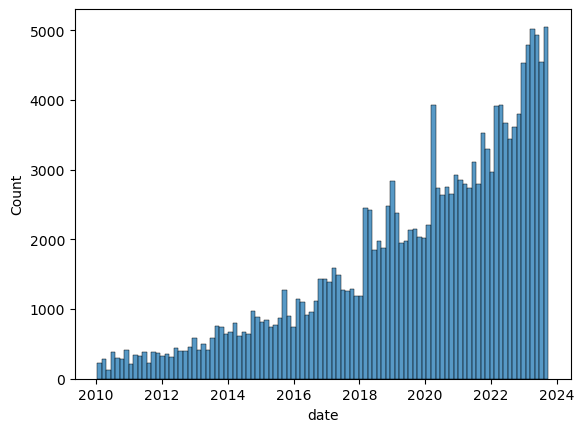

In [219]:
sns.histplot(df_relative['date'], bins=100)

In [362]:
df_relative['c_expire_intrinsic'] = df_relative['close_expire'] - df_relative['strike']
df_relative['p_expire_intrinsic'] = df_relative['strike'] - df_relative['close_expire']

In [363]:
df_relative['c_intrinsic'] = df_relative['close'] - df_relative['strike']
df_relative['p_intrinsic'] = df_relative['strike'] - df_relative['close']

In [364]:
df_relative.drop(index=df_relative[df_relative['c_intrinsic'] < -1_000].index, inplace=True)

<Axes: xlabel='c_intrinsic', ylabel='expire_intrinsic'>

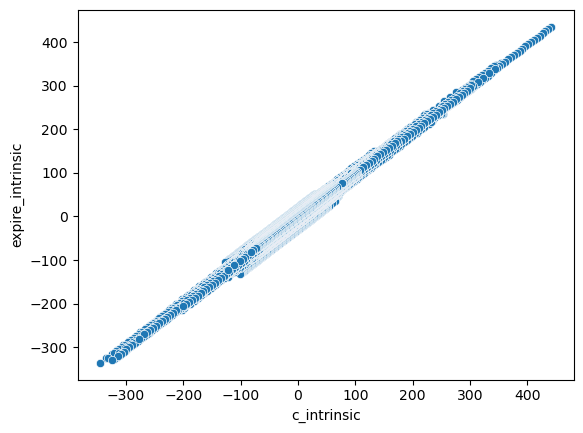

In [245]:
sns.scatterplot(x='c_intrinsic', y='expire_intrinsic', data=df_relative)

In [230]:
df_relative[['c_intrinsic', 'expire_intrinsic']].corr()

,c_intrinsic,expire_intrinsic
c_intrinsic,1.000000,0.997209
expire_intrinsic,0.997209,1.000000


<Axes: xlabel='expire_intrinsic', ylabel='Count'>

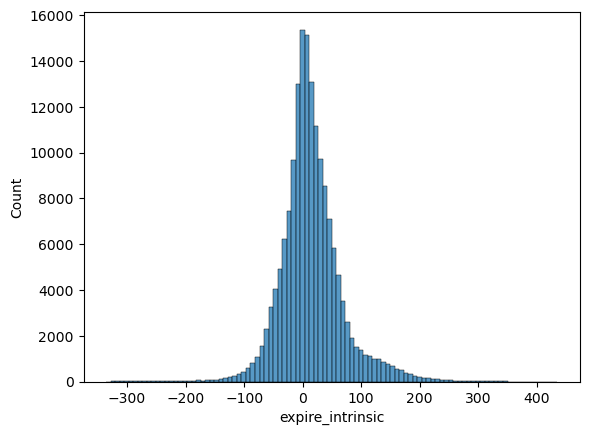

In [258]:
sns.histplot(df_relative['expire_intrinsic'], bins=100)

<Axes: xlabel='c_bid', ylabel='expire_intrinsic'>

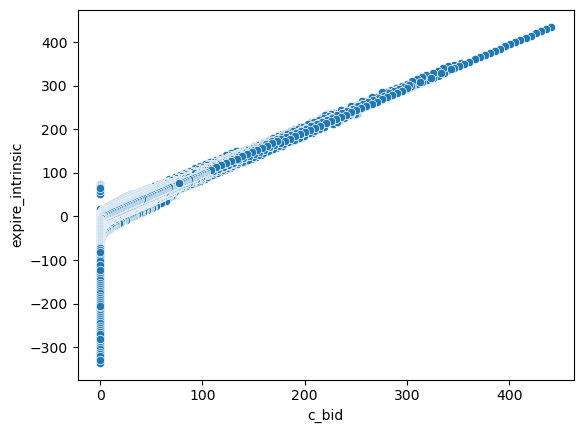

In [246]:
sns.scatterplot(x='c_bid', y='expire_intrinsic', data=df_relative)

In [332]:
df_relative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168242 entries, 7819 to 8751159
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   strike              168242 non-null  float64       
 1   c_bid               168242 non-null  float64       
 2   c_ask               168242 non-null  float64       
 3   p_bid               168242 non-null  float64       
 4   p_ask               168242 non-null  float64       
 5   c_intrinsic         168242 non-null  float64       
 6   p_intrinsic         168242 non-null  float64       
 7   close_expire        168242 non-null  float64       
 8   date                168242 non-null  datetime64[ns]
 9   open                168242 non-null  float64       
 10  high                168242 non-null  float64       
 11  low                 168242 non-null  float64       
 12  close               168242 non-null  float64       
 13  252_high            168242 non

In [365]:
df_relative['c_buyer_profit'] = df_relative['c_expire_intrinsic'].clip(lower=0) - df_relative['c_ask'].clip(lower=0.01)
df_relative['p_buyer_profit'] = df_relative['p_expire_intrinsic'].clip(lower=0) - df_relative['p_ask'].clip(lower=0.01)

In [366]:
df_relative.columns

Index(['strike', 'c_bid', 'c_ask', 'p_bid', 'p_ask', 'c_intrinsic',
       'p_intrinsic', 'close_expire', 'date', 'open', 'high', 'low', 'close',
       '252_high', '252_low', '21_high', '21_low', '5_high', '5_low', '5_ma',
       '10_ma', '20_ma', '50_ma', '100_ma', '200_ma', 'expire_day',
       'c_expire_intrinsic', 'p_expire_intrinsic', 'c_buyer_profit',
       'p_buyer_profit'],
      dtype='object')

In [367]:
col_to_normalize = ['strike', 'c_ask', 'p_ask', 'c_intrinsic','p_intrinsic', 
                    'open', 'high', 'low', '252_high', '252_low', 
                    '21_high', '21_low', '5_high', '5_low', '5_ma', '10_ma', 
                    '20_ma', '50_ma', '100_ma', '200_ma', 'c_buyer_profit', 'p_buyer_profit']

for col in col_to_normalize:
    df_relative[col] = df_relative[col] / df_relative['close']

In [369]:
df_c = df_relative[['strike', 'c_ask', 'p_ask', 'c_intrinsic',
       'p_intrinsic', 'date', 'open', 'high', 'low', 'close',
       '252_high', '252_low', '21_high', '21_low', '5_high', '5_low', '5_ma',
       '10_ma', '20_ma', '50_ma', '100_ma', '200_ma', 'expire_day',
       'c_buyer_profit']]

# set index to date

df_c.set_index('date', inplace=True)

df_p = df_relative[['strike', 'c_ask', 'p_ask', 'c_intrinsic',
       'p_intrinsic', 'date', 'open', 'high', 'low', 'close',
       '252_high', '252_low', '21_high', '21_low', '5_high', '5_low', '5_ma',
       '10_ma', '20_ma', '50_ma', '100_ma', '200_ma', 'expire_day',
       'p_buyer_profit']]

df_p.set_index('date', inplace=True)

In [377]:
df_c = df_c[(df_c['c_ask'] > 0) & (df_c['c_ask'] < 1)]

df_p = df_p[(df_p['p_ask'] > 0) & (df_p['p_ask'] < 1)]

In [383]:
df_c

,strike,c_ask,p_ask,c_intrinsic,p_intrinsic,open,high,low,close,252_high,...,5_high,5_low,5_ma,10_ma,20_ma,50_ma,100_ma,200_ma,expire_day,c_buyer_profit
date,,,,,,,,,,,,,,,,,,,,,
2010-01-14,0.478552,0.523362,0.000087,0.521448,-0.521448,0.996172,1.001827,0.995562,114.930000,1.001827,...,1.001827,0.985121,0.996276,0.990873,0.981471,0.966270,0.941795,0.871234,Friday,-0.013138
2010-01-14,0.487253,0.514661,0.000174,0.512747,-0.512747,0.996172,1.001827,0.995562,114.930000,1.001827,...,1.001827,0.985121,0.996276,0.990873,0.981471,0.966270,0.941795,0.871234,Friday,-0.013138
2010-01-14,0.495954,0.505960,0.000174,0.504046,-0.504046,0.996172,1.001827,0.995562,114.930000,1.001827,...,1.001827,0.985121,0.996276,0.990873,0.981471,0.966270,0.941795,0.871234,Friday,-0.013138
2010-01-14,0.504655,0.497259,0.000087,0.495345,-0.495345,0.996172,1.001827,0.995562,114.930000,1.001827,...,1.001827,0.985121,0.996276,0.990873,0.981471,0.966270,0.941795,0.871234,Friday,-0.013138
2010-01-14,0.513356,0.488558,0.000174,0.486644,-0.486644,0.996172,1.001827,0.995562,114.930000,1.001827,...,1.001827,0.985121,0.996276,0.990873,0.981471,0.966270,0.941795,0.871234,Friday,-0.013138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-29,1.164967,0.000023,0.166136,-0.164967,0.164967,1.009802,1.010223,0.996327,427.480011,1.074764,...,1.011205,0.987859,1.001291,1.012199,1.029130,1.039408,1.023877,0.980005,Friday,-0.000023
2023-09-29,1.167306,0.000023,0.168031,-0.167306,0.167306,1.009802,1.010223,0.996327,427.480011,1.074764,...,1.011205,0.987859,1.001291,1.012199,1.029130,1.039408,1.023877,0.980005,Friday,-0.000023
2023-09-29,1.169645,0.000023,0.170815,-0.169645,0.169645,1.009802,1.010223,0.996327,427.480011,1.074764,...,1.011205,0.987859,1.001291,1.012199,1.029130,1.039408,1.023877,0.980005,Friday,-0.000023


<Axes: xlabel='c_buyer_profit', ylabel='Count'>

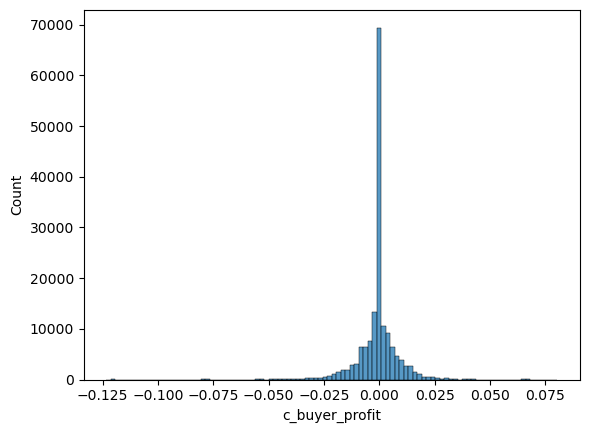

In [378]:
sns.histplot(df_c['c_buyer_profit'], bins=100)

<Axes: xlabel='p_buyer_profit', ylabel='Count'>

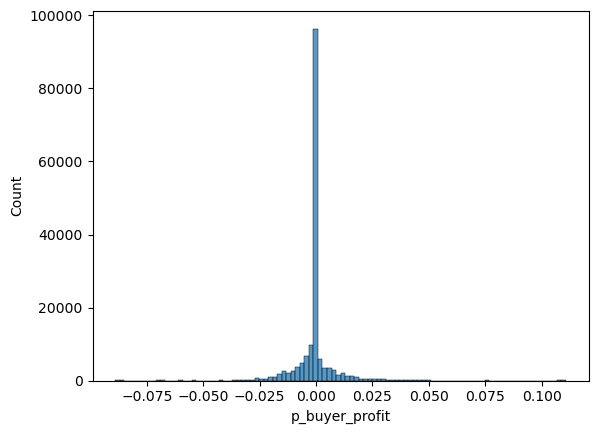

In [379]:
sns.histplot(df_p['p_buyer_profit'], bins=100)

In [381]:
df_c['c_buyer_profit'].describe()

count    164173.000000
mean         -0.000548
std           0.008714
min          -0.123422
25%          -0.002396
50%          -0.000036
75%           0.001562
max           0.080247
Name: c_buyer_profit, dtype: float64

In [382]:
df_p['p_buyer_profit'].describe()

count    161805.000000
mean         -0.000528
std           0.008850
min          -0.089033
25%          -0.000920
50%          -0.000053
75%          -0.000024
max           0.110723
Name: p_buyer_profit, dtype: float64

In [392]:
# one hot encode expire_day

df_c = pd.get_dummies(df_c, columns=['expire_day'])

df_p = pd.get_dummies(df_p, columns=['expire_day'])

In [395]:
X_c = df_c.drop(columns=['c_buyer_profit'])
y_c = df_c['c_buyer_profit']

X_p = df_p.drop(columns=['p_buyer_profit'])
y_p = df_p['p_buyer_profit']

In [396]:
# train test split

from sklearn.model_selection import train_test_split

X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.2, shuffle=False)

X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_p, y_p, test_size=0.2, shuffle=False)

In [397]:
from sklearn.ensemble import RandomForestRegressor

rf_c = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=1948)

rf_c.fit(X_c_train, y_c_train)

rf_p = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=1948)

rf_p.fit(X_p_train, y_p_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=1948)

In [399]:
from sklearn.metrics import mean_squared_error

y_c_pred = rf_c.predict(X_c_test)

print('rf_c:')
print(mean_squared_error(y_c_test, y_c_pred, squared=False))

y_c_pred_naive = [0] * len(y_c_test)

print('naive:')
print(mean_squared_error(y_c_test, y_c_pred_naive, squared=False))

rf_c:
0.007071552974597275
naive:
0.007104096751272384


In [400]:
y_p_pred = rf_p.predict(X_p_test)

print('rf_p:')
print(mean_squared_error(y_p_test, y_p_pred, squared=False))

y_p_pred_naive = [0] * len(y_p_test)

print('naive:')
print(mean_squared_error(y_p_test, y_p_pred_naive, squared=False))

rf_p:
0.006652490116377991
naive:
0.006667538013105145


<Axes: >

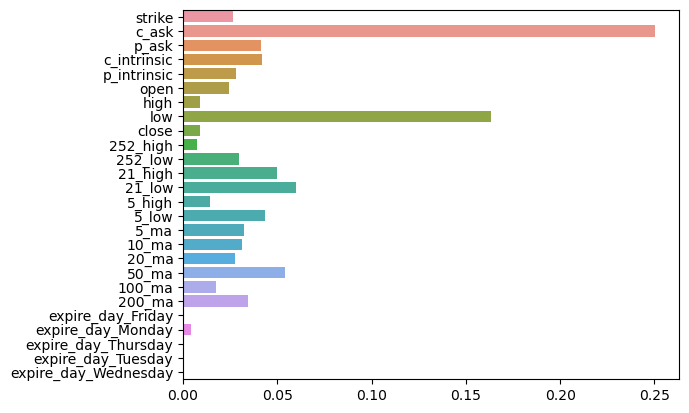

In [401]:
sns.barplot(x=rf_c.feature_importances_, y=X_c.columns)

<Axes: >

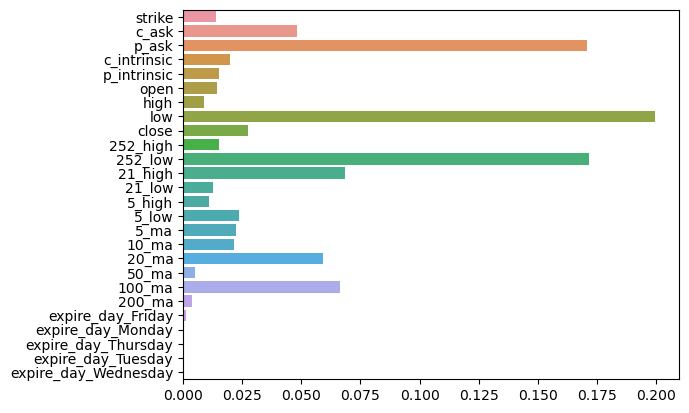

In [402]:
sns.barplot(x=rf_p.feature_importances_, y=X_p.columns)

In [412]:
# grid search

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

rf_c = RandomForestRegressor(n_jobs=-1, random_state=1948)

grid_search = GridSearchCV(estimator=rf_c, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_c_train, y_c_train)

rf_c = grid_search.best_estimator_

rf_c.fit(X_c_train, y_c_train)

y_c_pred = rf_c.predict(X_c_test)

print('rf_c:')

print(mean_squared_error(y_c_test, y_c_pred, squared=False))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .....................max_depth=10, n_estimators=100; total time=  59.5s
[CV] END .....................max_depth=10, n_estimators=100; total time=  59.7s
[CV] END .....................max_depth=10, n_estimators=100; total time= 1.0min
[CV] END .....................max_depth=10, n_estimators=200; total time= 1.9min
[CV] END .....................max_depth=10, n_estimators=200; total time= 1.9min
[CV] END .....................max_depth=10, n_estimators=200; total time= 2.0min
[CV] END .....................max_depth=20, n_estimators=100; total time= 1.7min
[CV] END .....................max_depth=20, n_estimators=100; total time= 1.7min
[CV] END .....................max_depth=10, n_estimators=300; total time= 2.9min
[CV] END .....................max_depth=10, n_estimators=300; total time= 2.9min
[CV] END .....................max_depth=20, n_estimators=100; total time= 1.7min
[CV] END .....................max_depth=10, n_est

In [415]:
# convert y_c_train & test to binary classification

y_c_train_binary = y_c_train.apply(lambda x: 1 if x > 0 else 0)

y_c_test_binary = y_c_test.apply(lambda x: 1 if x > 0 else 0)

In [417]:
y_c_train_binary.value_counts(normalize=True)

c_buyer_profit
0    0.682415
1    0.317585
Name: proportion, dtype: float64

In [425]:
from sklearn.ensemble import RandomForestClassifier

rf_c = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=1948)

rf_c.fit(X_c_train, y_c_train_binary)

y_c_pred = rf_c.predict(X_c_test)

from sklearn.metrics import classification_report

print(classification_report(y_c_test_binary, y_c_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83     24530
           1       0.46      0.29      0.36      8305

    accuracy                           0.73     32835
   macro avg       0.62      0.59      0.59     32835
weighted avg       0.70      0.73      0.71     32835



In [426]:
print(classification_report(y_c_test_binary,[0] * len(y_c_pred)))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     24530
           1       0.00      0.00      0.00      8305

    accuracy                           0.75     32835
   macro avg       0.37      0.50      0.43     32835
weighted avg       0.56      0.75      0.64     32835



/Users/gregorysamek/anaconda3/envs/bt-nn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gregorysamek/anaconda3/envs/bt-nn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gregorysamek/anaconda3/envs/bt-nn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [380]:
df_relative.to_parquet('df_relative.parquet')